# Travail pratique 2
*INF600F - Traitement d'images (A2024, UQÀM)*

* NOM, Prénom (Code permanent) de chaque membre de l'équipe:
  
  * Foruzanmehr, Vahid (forv26018703)

In [2]:
# Importation des modules
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt
from skimage.transform import resize

## Exercice 1 : Transformée de Fourier

### Etape 1 : Lire et afficher l’image tp2_ex1.tif

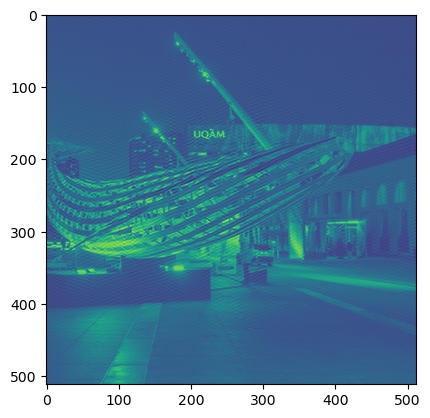

In [5]:
image_q1 = iio.v2.imread('tp2_ex1.tif')
plt.imshow(image_q1)

### Calculer la transformée de Fourier

In [7]:
# fonction fft2 pour calculer la transformée de Fourier
image_fourier =  np.fft.fft2(image_q1)
# fonction fftshift pour placer la fréquence nulle au centre de l’image.
image_fourier_shift = np.fft.fftshift(image_fourier)

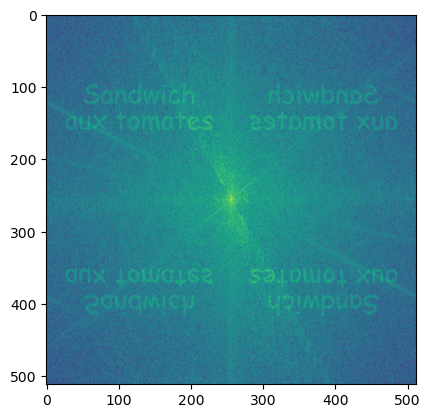

In [8]:
plt.imshow(np.log(np.abs(image_fourier_shift)))

### Créer la fonction python display_fft
pour afficher l’amplitude et la phase de la transformée de Fourier.

Assurez-vous d’utiliser une transformation logarithmique pour transformer l’échelle d’intensité de l’amplitude pour l’affichage. Vous devez représenter la transformée de Fourier dans le domaine fréquentiel selon la convention usuelle (c.-à-d. fréquence nulle au centre de l’image), en indexant les axes en fréquences réduites (comprises entre -1/2 et 1/2) (utilisez l’option extent de plt.imshow)

In [10]:
def display_fft(img_fft):
    """Affichage de l'amplitude et de la phase d'une transformée de Fourier

    Parameters
    ----------
    img_fft : ndarray
        Transformée de Fourier d'une image
    """
    # Application d'une transformation logarithmique pour l'amplitude
    amplitude_log = np.log(np.abs(img_fft))
    # Déplacement de la fréquence zéro au centre
    amplitude_log_shifted = np.fft.fftshift(amplitude_log)

    ## Calcul de l'amplitude et de la phase
    phase_shifted = np.fft.fftshift(np.angle(img_fft))

    # Taille de l'image pour indexer les fréquences réduites
    rows, cols = img_fft.shape
    extent = [-0.5, 0.5, -0.5, 0.5]
    # Affichage
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(amplitude_log, cmap='gray', extent=extent)
    plt.title('Amplitude de\nTransformée de Fourier')
    plt.xlabel('Fréquence réduite en X')
    plt.ylabel('Fréquence réduite en Y')
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(amplitude_log_shifted, cmap='gray', extent=extent)
    plt.title('Amplitu de\nTransformée de Fourier et\nfréquence nulle au centre de l’image')
    plt.xlabel('Fréquence réduite en X')
    plt.ylabel('Fréquence réduite en Y')
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(phase_shifted, cmap='gray', extent=extent)
    plt.title('Phase de la transformée de Fourier')
    plt.xlabel('Fréquence réduite en X')
    plt.ylabel('Fréquence réduite en Y')

    # Afficher les deux sous-graphiques
    # plt.tight_layout()
    plt.show()


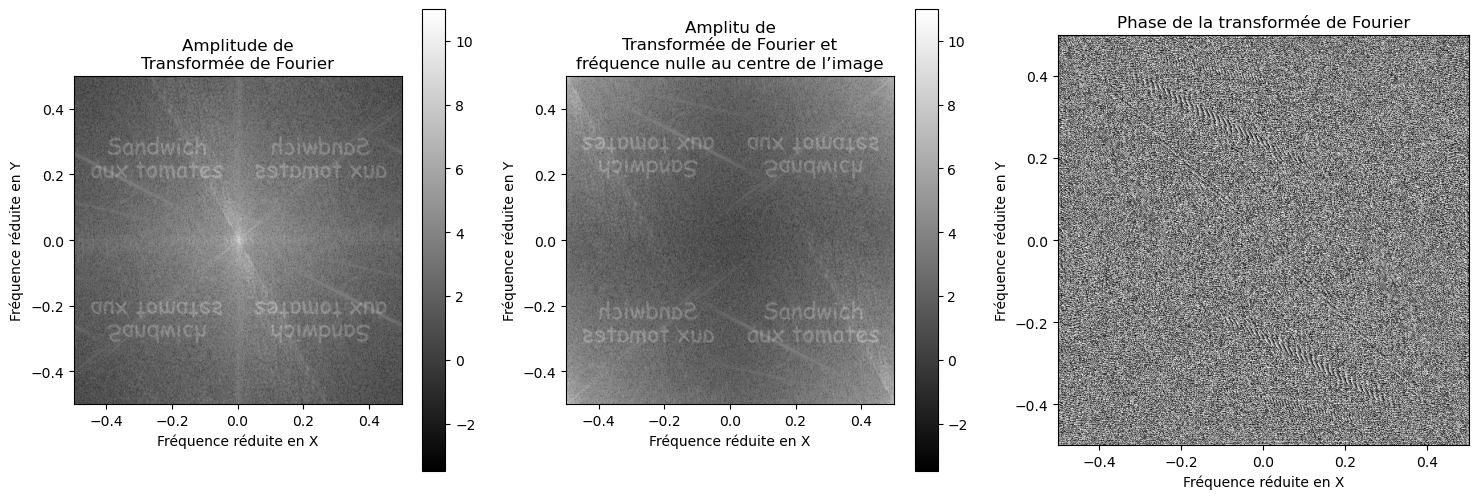

In [11]:
display_fft(image_fourier_shift)

### Trouver le message codé secret caché dans le domaine fréquentiel de l’image.

```
Sandwich aux tomates
```


### Expliquez comment le message a été crypté dans l’image et pourquoi il n’était pas visible dans l’image originale.

Le message a été caché dans l'image en utilisant une technique appelée stéganographie. Cette méthode modifie légèrement les pixels de l'image en changeant les bits les moins importants (ceux qui ont le moins d'effet sur la couleur), ce qui ne change presque rien à l'apparence de l'image. Ces petits changements sont trop subtils pour être visibles à l'œil nu, donc le message reste invisible dans l'image originale. Pour le lire, il faut utiliser un programme spécial qui récupère ces petits bits modifiés et reconstitue le message, ce qui explique pourquoi on ne peut pas le voir directement.

## Exercice 2 : Filtrage fréquentiel

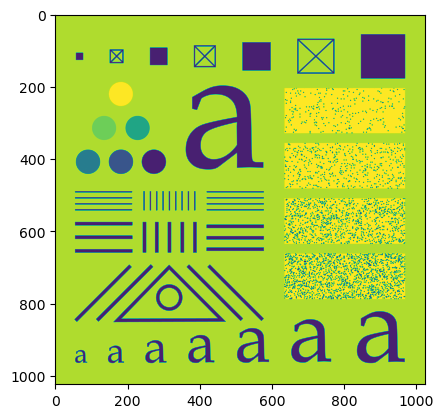

In [16]:
image2_q2 = iio.v2.imread('tp2_ex2.tif')
plt.imshow(image2_q2)

### Partie 1 : Filtres fréquentiels

In [18]:
def fonc_distance(u, v, P, Q):
  return ((u - P/2)**2 + (v - Q/2)**2 ) ** 0.5


In [19]:
def lpFilterTF(type, P, Q, param):
  """Crée un filtre passe bas fréquentiel

  Parameters
  ----------
  type : str
      Type de filtre. Valeurs possibles : 'ideal', 'gaussian', 'butterworth'
  P : int
      Nombre de ligne du filtre
  Q : int
      Nombre de colonne du filtre
  param : float ou list
      Si type='ideal' ou type='gaussian', param=d0
      Si type='butterworth', type=[d0,n] ---> param=[d0,n]

  Returns
  -------
    H : ndarray
    Filtre fréquentiel passe bas de taille PxQ
  """
  h = np.zeros((P,Q))
  for u in range(P):
    for v in range(Q):
      if (type == 'ideal'):
        if (fonc_distance(u,v,P,Q) <= param):
          h[u,v] = 1
        else:
          h[u,v] = 0
      elif (type == 'gaussian'):
        h[u,v] = np.exp(-(fonc_distance(u,v,P,Q)**2)/(2*param**2))
      elif (type == 'butterworth'):
        ordre = 2
        h[u,v] = 1 / (1 + (fonc_distance(u,v,P,Q)/param)**(2*ordre))

  return h

### Partie 2 : Validation des filtres

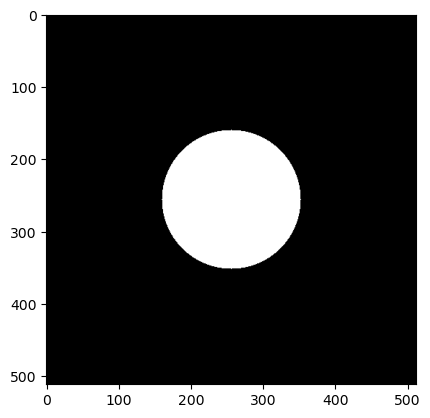

In [21]:
noyau_ideal = lpFilterTF('ideal', 512, 512, 96)
plt.imshow(noyau_ideal, cmap='gray')

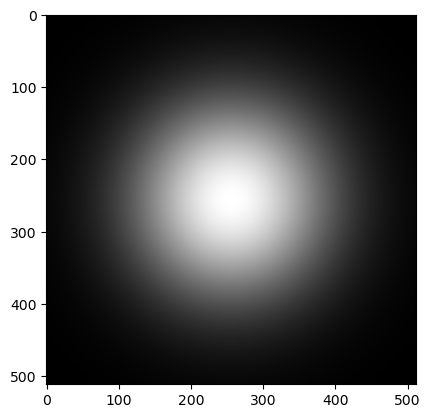

In [22]:
h2_gauss = lpFilterTF('gaussian', 512, 512, 96)
plt.imshow(h2_gauss, cmap='gray')

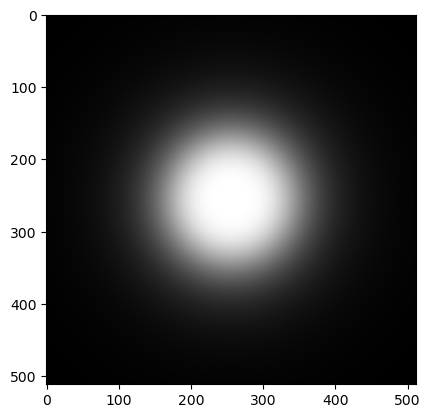

In [23]:
h3_butterworth = lpFilterTF('butterworth', 512, 512, 96)
plt.imshow(h3_butterworth, cmap='gray')

### Partie 3 : Application des filtres fréquentiels

In [25]:
image2_resized = resize(np.abs(image2_q2), (512, 512))

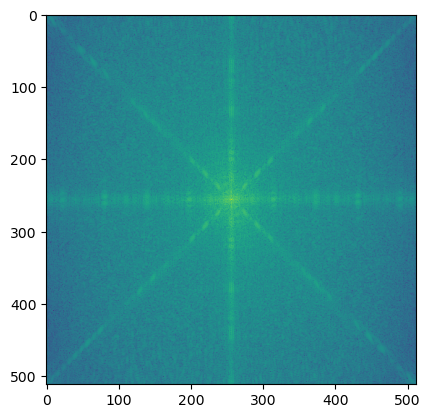

In [26]:
img_fft = np.fft.fft2(image2_resized)
img_fft = np.fft.fftshift(img_fft)
plt.imshow(np.log(np.abs(img_fft)))

#### 1 - filtre passe-bas idéal

In [28]:
noyau_ideal = lpFilterTF('ideal', 512, 512, 18)

In [29]:
multi_ideal = noyau_ideal * img_fft

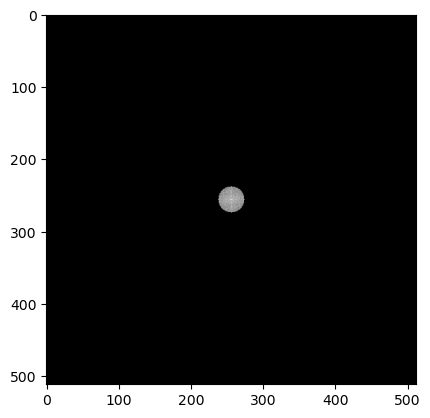

In [30]:
plt.imshow(np.log(np.abs(multi_ideal)+0.1), cmap='gray')

In [31]:
img_fft_ideal = np.fft.ifftshift(multi_ideal)
img_fft_ideal = np.fft.ifft2(img_fft_ideal)

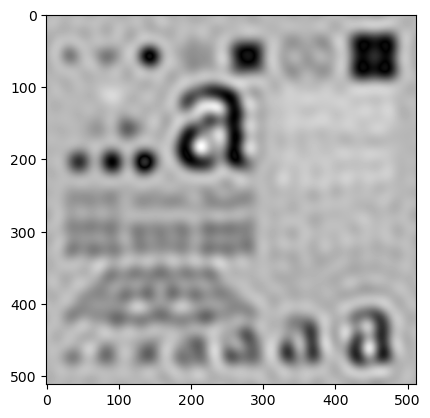

In [32]:
plt.imshow(np.abs(img_fft_ideal), cmap='gray')

#### 2 - filtre passe-bas gaussien

In [34]:
noyau_gauss = lpFilterTF('gaussian', 512, 512, 8)

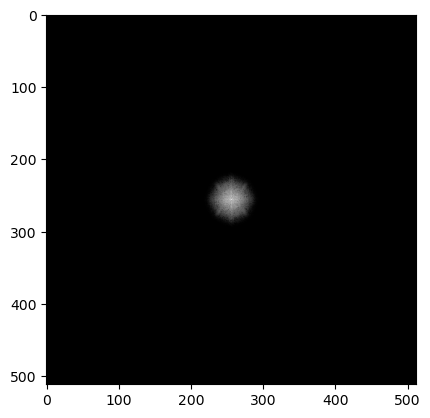

In [35]:
multi_gauss = noyau_gauss * img_fft
plt.imshow(np.log(np.abs(multi_gauss) + 0.1), cmap='gray')

In [36]:
img_fft_gauss = np.fft.ifftshift(multi_gauss)
img_fft_gauss = np.fft.ifft2(img_fft_gauss)

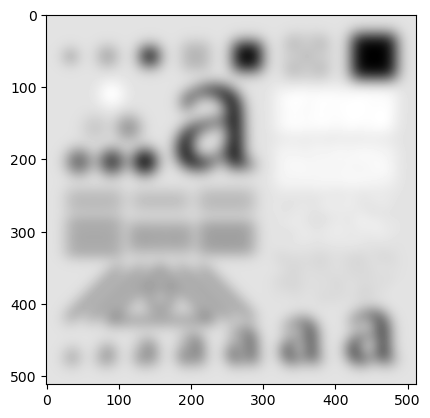

In [37]:
plt.imshow(np.abs(img_fft_gauss), cmap='gray')

#### 3 - filtre Butterworth

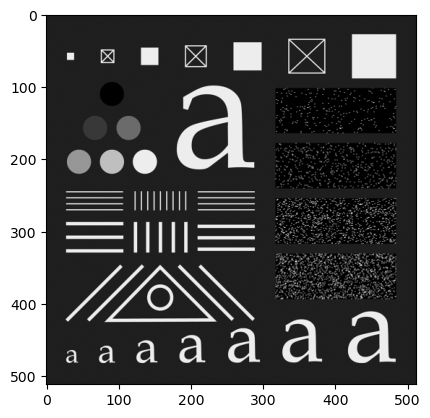

In [39]:
image2_resized_negative = 255 - image2_resized
plt.imshow(np.log(np.abs(image2_resized_negative)), cmap='gray')

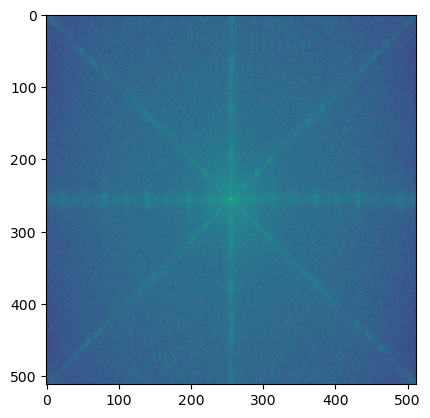

In [40]:
img_fft_butterworth = np.fft.fft2(image2_resized_negative)
img_fft_butterworth = np.fft.fftshift(img_fft_butterworth)
plt.imshow(np.log(np.abs(img_fft_butterworth)))

In [41]:
noyau_butterworth = lpFilterTF('butterworth', 512, 512, 6)

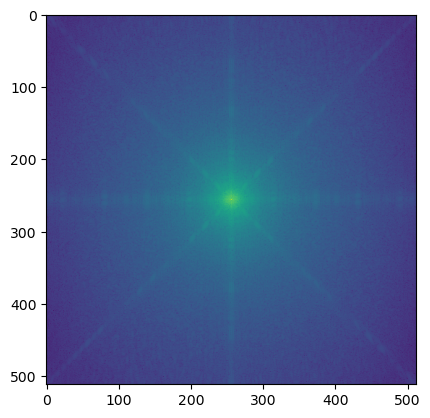

In [42]:
multi_butterworth = noyau_butterworth * img_fft_butterworth
plt.imshow(np.log(np.abs(multi_butterworth)))

In [43]:
img_fft_butterworth_inverse = np.fft.ifftshift(multi_butterworth)
img_fft_butterworth_inverse = np.fft.ifft2(img_fft_butterworth_inverse)

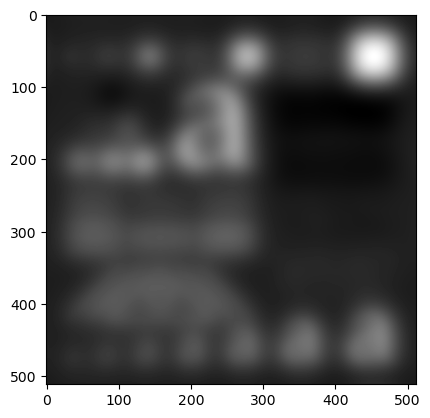

In [44]:
plt.imshow(np.abs(img_fft_butterworth_inverse), cmap='gray')